In [1]:
import pandas as pd
import math
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# load data
data = pd.read_csv("Summary1.csv")

# ANOVA Analysis for alignment

In [3]:
## construct perceived review helpfulness and conceptual processing fluency
data["PRH_1"] = (data["PRH1_1"]+data["PRH2_1"]+data["PRH3_1"])/3
data["PRH_2"] = (data["PRH1_2"]+data["PRH2_2"]+data["PRH3_2"])/3
data["PRH_3"] = (data["PRH1_3"]+data["PRH2_3"]+data["PRH3_3"])/3
data["CPF_1"] = (data["CPF1_1"]+data["CPF2_1"]+data["CPF3_1"])/3
data["CPF_2"] = (data["CPF1_2"]+data["CPF2_2"]+data["CPF3_2"])/3
data["CPF_3"] = (data["CPF1_3"]+data["CPF2_3"]+data["CPF3_3"])/3
data["PRH"] = (data["PRH_1"] + data["PRH_2"] + data["PRH_3"]) / 3
data["CPF"] = (data["CPF_1"] + data["CPF_2"] + data["CPF_3"]) / 3

display(data.groupby("Group")[["PRH_1","PRH_2","PRH_3", "PRH", "CPF"]].agg(["mean","sem"]))

PRH_1               PRH_2               PRH_3                 PRH  \
           mean       sem      mean       sem      mean       sem      mean   
Group                                                                         
1      2.963768  0.239257  4.514493  0.240260  5.340580  0.198624  4.272947   
2      3.244898  0.206374  4.795918  0.229367  5.163265  0.168673  4.401361   
3      3.493333  0.190295  4.793333  0.202006  5.166667  0.155693  4.484444   
4      3.246667  0.222501  4.360000  0.212498  5.220000  0.155798  4.275556   
5      5.140000  0.178959  5.240000  0.177675  4.826667  0.205644  5.068889   
6      5.138211  0.159171  4.837398  0.214679  4.829268  0.180004  4.934959   
7      5.433333  0.161269  5.055556  0.174157  4.711111  0.199571  5.066667   
8      4.856209  0.157943  4.823529  0.199641  4.856209  0.193186  4.845316   
9      4.829268  0.221513  5.341463  0.156385  5.130081  0.152610  5.100271   
10     5.263889  0.180283  5.402778  0.158474  4.986111  0.189863  5.217593   
11     5.181818  0.167705  5.484848  0.176907  5.515152  0.139824  5.393939   
12     5.166667  0.173038  5.267857  0.185984  5.553571  0.106863  5.329365   
13     5.411111  0.164366  5.444444  0.171341  5.577778  0.121424  5.477778   
14     5.602564  0.117598  5.320513  0.167535  5.365385  0.181298  5.429487   
15     5.794872  0.148272  5.606838  0.173552  5.042735  0.190169  5.481481   
16     5.393333  0.158991  5.260000  0.198244  5.520000  0.145425  5.391111   
17     4.475000  0.245439  3.366667  0.249729  3.500000  0.273471  3.780556   
18     5.300813  0.135153  4.219512  0.221356  4.203252  0.234225  4.574526   
19     5.433333  0.128103  4.716667  0.197040  4.641667  0.251034  4.930556   

                      CPF            
            sem      mean       sem  
Group                                
1      0.152070  4.420290  0.157700  
2      0.124598  4.625850  0.141554  
3      0.126895  4.526667  0.141610  
4      0.133267  4.513333  0.145613  
5      0.118608  5.133333  0.105672  
6      0.114447  5.010840  0.132143  
7      0.123768  5.103704  0.118371  
8      0.132936  4.938998  0.143758  
9      0.124698  5.466125  0.136150  
10     0.112528  5.361111  0.120310  
11     0.123380  5.429293  0.136398  
12     0.116189  5.248016  0.115011  
13     0.114002  5.662963  0.106462  
14     0.108097  5.564103  0.115299  
15     0.107788  5.492877  0.153205  
16     0.133870  5.506667  0.144790  
17     0.194556  3.822222  0.156923  
18     0.159696  4.086721  0.201227  
19     0.160902  4.647222  0.189085

In [4]:
## construct high-alignment vs. low-alignment groups
# filter out no picture or text groups (otherwise, valence alignment is not applicable)
test_alignment_df = data[data['Group'].isin([1,2,3,5,6,7,9,10,11,13,14,15])].copy()
# define valence alignment groups
test_alignment_df['Valence_Alignment'] = test_alignment_df['Group'].apply(lambda x: 1 if x in [5, 10, 15, 11] else 0)
# define low valence alignment groups
test_alignment_df['Low_Valence_Alignment'] = test_alignment_df['Group'].apply(lambda x: 1 if x in [1,2,3] else 0)
# generate three alignment levels
test_alignment_df['Alignment'] = test_alignment_df['Group'].apply(lambda x: 2 if x in [5,10,15, 11] else 0 if x in [1,2,3] else 1)
display(test_alignment_df[['Group','Valence_Alignment','Low_Valence_Alignment', 'Alignment']].drop_duplicates())

,Group,Valence_Alignment,Low_Valence_Alignment,Alignment
0,1,0,1,0
46,2,0,1,0
95,3,0,1,0
195,5,1,0,2
245,6,0,0,1
286,7,0,0,1
397,9,0,0,1
438,10,1,0,2
486,11,1,0,2
586,13,0,0,1


In [5]:
test_alignment_df.groupby('Valence_Alignment')['PRH'].agg(['mean','sem'])

,mean,sem
Valence_Alignment,,
0,4.919521,0.048838
1,5.276243,0.059054


In [6]:
test_alignment_df.groupby('Alignment')['PRH'].agg(['mean','sem'])

,mean,sem
Alignment,,
0,4.389272,0.077347
1,5.222222,0.054347
2,5.276243,0.059054


In [7]:
# Perform ANOVA
model = ols('PRH ~ C(Valence_Alignment)', data=test_alignment_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

model = ols('PRH ~ C(Alignment)', data=test_alignment_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq     df         F    PR(>F)
C(Valence_Alignment)   15.844679    1.0  18.59986  0.000019
Residual              492.381354  578.0       NaN       NaN
                  sum_sq     df          F        PR(>F)
C(Alignment)   79.886974    2.0  53.806422  3.743928e-22
Residual      428.339059  577.0        NaN           NaN


In [8]:
mapping = {'L': 0, 'B': 1, 'H': 2, 'VH': 3}
test_alignment_df['Text-valence'] = test_alignment_df['T-T'].map(mapping)
test_alignment_df['Picture-valence'] = test_alignment_df['T-P'].map(mapping)

In [9]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

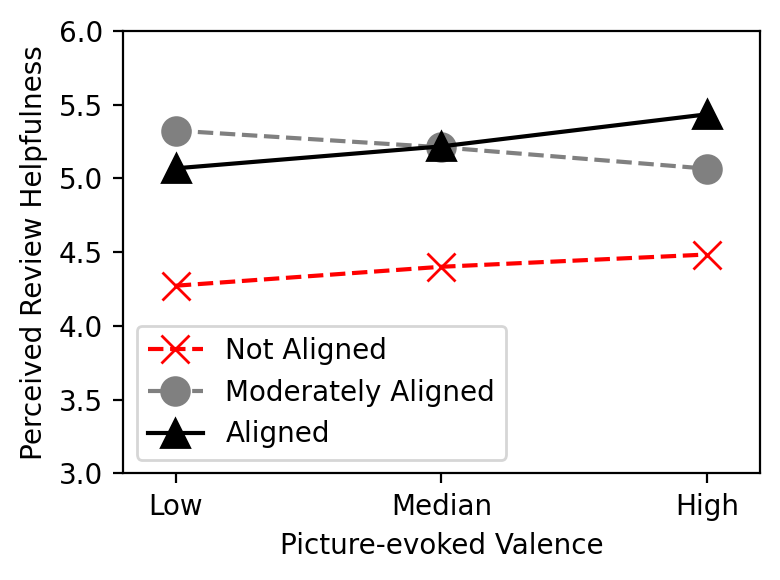

In [10]:
# Create interaction plot
fig = plt.figure(figsize=(4, 3), dpi=200)
interaction_plot(test_alignment_df['Picture-valence'], test_alignment_df['Alignment'], test_alignment_df['PRH'], 
                       colors = ['red', 'gray', 'black'], markers = ['x','o','^'], linestyles=['--','--','-'] ,ms=10, ax=fig.gca())
plt.ylabel('Perceived Review Helpfulness')
plt.xlabel('Picture-evoked Valence')
plt.ylim(3, 6)
plt.xticks([1, 2, 3], ['Low', 'Median', 'High'])
legend = plt.legend(['Not Aligned', 'Moderately Aligned', 'Aligned'], loc='lower left')
plt.tight_layout()
plt.savefig('interaction_plot.png')
plt.show()

## robustness check with removing groups 5, 6, 7 for their potential lower text-expressed arousal

In [11]:
test_alignment_rob= test_alignment_df[test_alignment_df['Group'].isin([1,2,3,9,10,11,13,14,15])].copy()

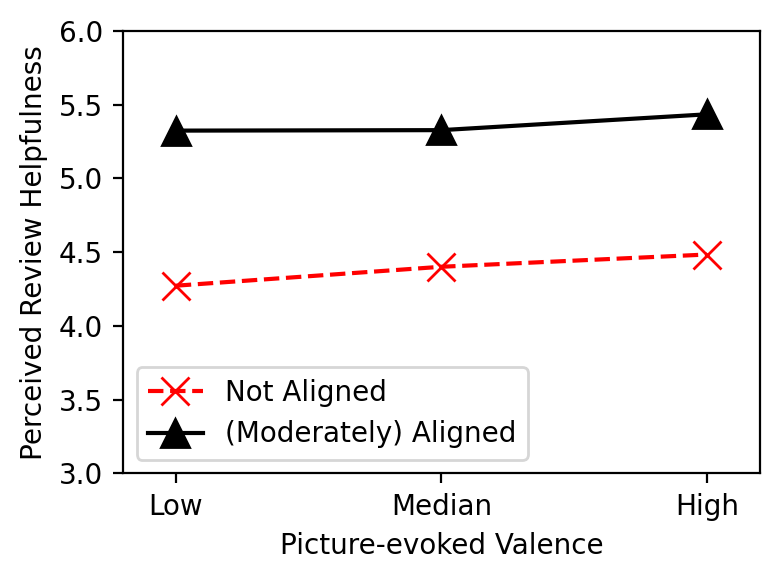

In [12]:
# Create interaction plot
fig = plt.figure(figsize=(4, 3), dpi=200)
interaction_plot(test_alignment_rob['Picture-valence'], (test_alignment_rob['Alignment']>0)*1, test_alignment_rob['PRH'], 
                       colors = ['red', 'black'], markers = ['x','^'], linestyles=['--','-'] ,ms=10, ax=fig.gca())
plt.ylabel('Perceived Review Helpfulness')
plt.xlabel('Picture-evoked Valence')
plt.ylim(3, 6)
plt.xticks([1, 2, 3], ['Low', 'Median', 'High'])
legend = plt.legend(['Not Aligned', '(Moderately) Aligned'], loc='lower left')
plt.tight_layout()
plt.savefig('interaction_plot_robust.png')
plt.show()

# ANOVA for text-expressed emotional arousal

In [29]:
from scipy.stats import f_oneway

def anova_w_sum(means, stds, sample_size):
    # Simulate datasets
    rng = np.random.default_rng(seed=42)
    group1 = rng.normal(loc=means[0], scale=stds[0], size=sample_size)
    group2 = rng.normal(loc=means[1], scale=stds[1], size=sample_size)
    group3 = rng.normal(loc=means[2], scale=stds[2], size=sample_size)
    group4 = rng.normal(loc=means[3], scale=stds[3], size=sample_size)

    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(group1, group2, group3, group4)

    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")

    # Interpret results
    if p_value < 0.05:
        print("Reject the null hypothesis: At least one group mean is significantly different.")
    else:
        print("Fail to reject the null hypothesis: No significant difference among group means.")

    return


In [43]:
# the paper indicates that the sample size ranges from 8 to 25. We use 16 as the sample size for each group.
# Review, arousal : means and standard deviations
print('Review 1, arousal')
means = [5.36, 4.94, 5.27, 5.88]
stds = [2.53, 2.63, 2.79, 2.74]
sample_size = 16  # Number of samples per group
anova_w_sum(means, stds, sample_size)

print('Review 2, arousal')
means = [5.99, 4.30, 4.76, 5.82]
stds = [2.49, 2.42, 2.71, 2.68]
sample_size = 16  # Number of samples per group
anova_w_sum(means, stds, sample_size)

print('Review 3, arousal')
means = [5.43, 4.27, 4.91, 6.11]
stds = [2.85, 2.46, 2.77, 2.36]
sample_size = 16  # Number of samples per group
anova_w_sum(means, stds, sample_size)

Review 1, arousal
F-statistic: 0.13143818563096485
P-value: 0.9410108376796649
Fail to reject the null hypothesis: No significant difference among group means.
Review 2, arousal
F-statistic: 0.9421155135662113
P-value: 0.4260470235130671
Fail to reject the null hypothesis: No significant difference among group means.
Review 3, arousal
F-statistic: 0.8621330150231694
P-value: 0.4657733015901525
Fail to reject the null hypothesis: No significant difference among group means.


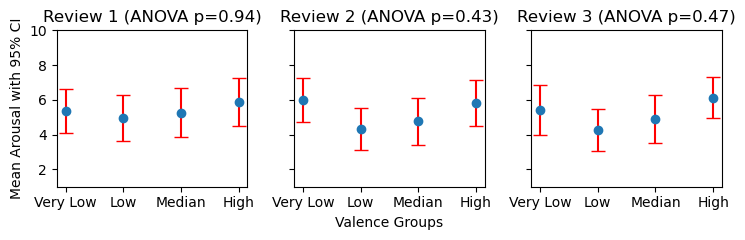

In [66]:
data_sets = {
    "Review 1 (ANOVA p=0.94)": {"means": [5.36, 4.94, 5.27, 5.88], "stds": [2.53, 2.63, 2.79, 2.74]},
    "Review 2 (ANOVA p=0.43)": {"means": [5.99, 4.30, 4.76, 5.82], "stds": [2.49, 2.42, 2.71, 2.68]},
    "Review 3 (ANOVA p=0.47)": {"means": [5.43, 4.27, 4.91, 6.11], "stds": [2.85, 2.46, 2.77, 2.36]},
}
sample_size = 16  # Number of samples per group
groups = ['Very Low', 'Low', 'Median', 'High']

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), sharey=True, sharex=True)
axes[0].set_ylabel('Mean Arousal with 95% CI')
axes[1].set_xlabel('Valence Groups')
# Plot each set in its own subplot
for ax, (set_name, data) in zip(axes, data_sets.items()):
    means = np.array(data["means"])
    stds = np.array(data["stds"])/math.sqrt(sample_size)  # Standard error of the mean
    error = [2 * std for std in stds]  # 2 standard deviations
    
    ax.errorbar(groups, means, yerr=error, fmt='o', capsize=5, capthick=1, label=f'{set_name} (Mean ± 2*Std)', ecolor='red')
    ax.set_title(set_name)
    ax.set_ylim(1, 10)

# Adjust layout
plt.tight_layout()
plt.savefig('arousal.png')
# Show plot
plt.show()
